# Two approaches of Classification : Brute-force vs PyCaret

# Approach 1 : Brute-force 

Stage 1 : Data setup 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tf_m = pd.read_csv('C:/Users/GoldenEye2.0/Desktop/QSB/MMAs/Text and Sentiment Analysis/SMS-Spam/SMS_Spam_Ham_Processed.csv')

In [3]:
df_tf_m.head()

,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_tf_m.tail()

,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
5569,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Stage 2 : Model Building

In [5]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [6]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [7]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Flag_spam']
    X = df.drop('Flag_spam', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)

 Random Forest Classifier
Wall time: 1.49 s

 Confusion Matrix


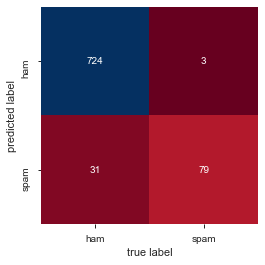


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.72      0.82       110

    accuracy                           0.96       837
   macro avg       0.96      0.86      0.90       837
weighted avg       0.96      0.96      0.96       837

Overall Accuracy :  95.94
Precision Score :  96.34
Recall Score :  71.82
AUC :  96.21 



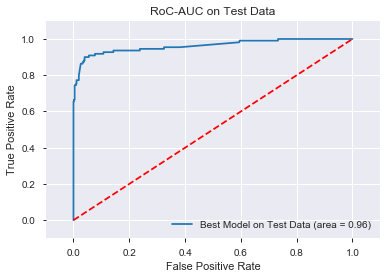

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 1.63 s

 Confusion Matrix


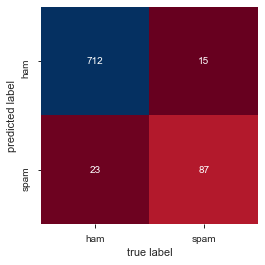


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.85      0.79      0.82       110

    accuracy                           0.95       837
   macro avg       0.91      0.89      0.90       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.46
Precision Score :  85.29
Recall Score :  79.09
AUC :  97.04 



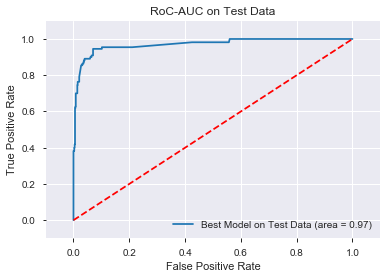

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 306 ms

 Confusion Matrix


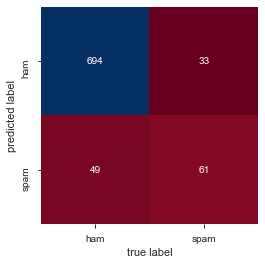


 Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       727
           1       0.65      0.55      0.60       110

    accuracy                           0.90       837
   macro avg       0.79      0.75      0.77       837
weighted avg       0.90      0.90      0.90       837

Overall Accuracy :  90.2
Precision Score :  64.89
Recall Score :  55.45
AUC :  65.73 



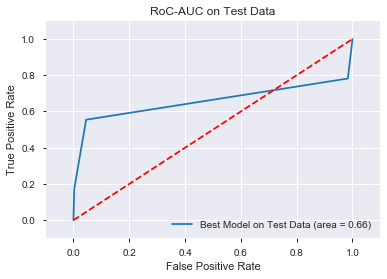

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 4.98 ms

 Confusion Matrix


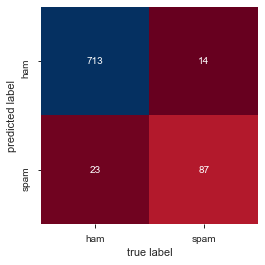


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.86      0.79      0.82       110

    accuracy                           0.96       837
   macro avg       0.92      0.89      0.90       837
weighted avg       0.95      0.96      0.95       837

Overall Accuracy :  95.58
Precision Score :  86.14
Recall Score :  79.09
AUC :  96.41 



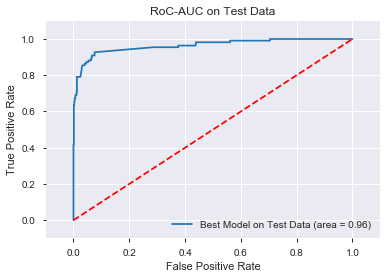

--------------------------------------------------------------------------


In [8]:
print('Models on Term Frequency - Bag of Words data')
model_dvt(df_tf_m)

Stage 3 : Hyper-parameter tuning

In [9]:
from sklearn.model_selection import GridSearchCV

Grid-Search hyperparameter tuning on AdaBoost Classifier

In [10]:
#Creating the same X_train, X_test, Y_train, Y_test variables but ouside the model_dvt function

Y = df_tf_m['Flag_spam']
X = df_tf_m.drop('Flag_spam', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)


In [11]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train, Y_train)

Wall time: 1min 8s


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 300}
Best_ROC-AUC :  96.05
Best model :  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)

 Confusion Matrix


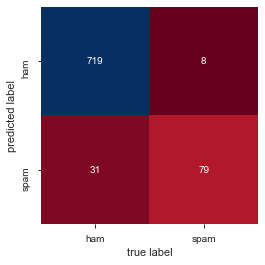


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       727
           1       0.91      0.72      0.80       110

    accuracy                           0.95       837
   macro avg       0.93      0.85      0.89       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.34
Precision Score :  90.8
Recall Score :  71.82
AUC :  96.61 



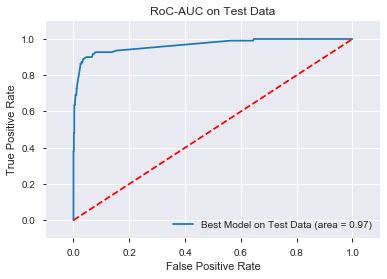

--------------------------------------------------------------------------
Wall time: 6.44 s
Cross Validation Accuracy :  95.46
Cross Validation Accuracy in every fold :  [98.81 95.24 95.24 97.62 91.67 96.43 96.43 95.18 92.77 95.18]


In [12]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

#### Think of a way to integrate the code below with the clf_report and model_dvt function.
#Kf_report(grid_object, X_test, Y_test)
kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

Grid-Search hyperparameter tuning on Random Forest Classifier

In [13]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

Wall time: 2min 33s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

Best_ROC-AUC :  96.07
Best model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Confusion Matrix


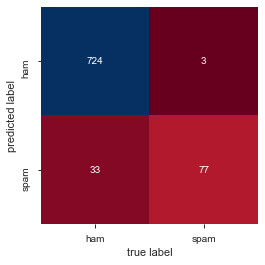


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.70      0.81       110

    accuracy                           0.96       837
   macro avg       0.96      0.85      0.89       837
weighted avg       0.96      0.96      0.95       837

Overall Accuracy :  95.7
Precision Score :  96.25
Recall Score :  70.0
AUC :  96.51 



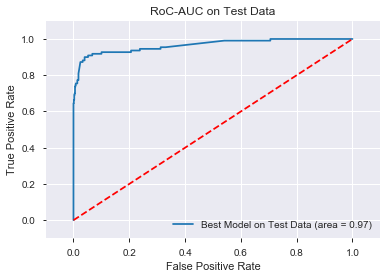

--------------------------------------------------------------------------
Wall time: 4.1 s
Cross Validation Accuracy :  94.26
Cross Validation Accuracy in every fold :  [98.81 94.05 91.67 97.62 94.05 95.24 94.05 90.36 91.57 95.18]


In [14]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

# Approach 2 : PyCaret

Stage1 : Data setup

In [15]:
from pycaret.classification import *

In [16]:
pce_1 = setup(data = df_tf_m, target = 'Flag_spam', session_id = 5, train_size = 0.85) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(5574, 78)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,77
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Stage2 : Model Building

In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.9609,0.9725,0.8124,0.8888,0.8478,0.8254
1,Light Gradient Boosting Machine,0.9597,0.9707,0.8219,0.8708,0.8452,0.8221
2,Extra Trees Classifier,0.958,0.959,0.8362,0.8492,0.842,0.8178
3,Random Forest Classifier,0.9571,0.958,0.8251,0.851,0.8373,0.8127
4,Logistic Regression,0.9559,0.9704,0.748,0.909,0.8198,0.795
5,SVM - Linear Kernel,0.954,0,0.751,0.9004,0.8109,0.7852
6,Gradient Boosting Classifier,0.9529,0.9581,0.7196,0.9114,0.8038,0.7775
7,Ada Boost Classifier,0.9521,0.9544,0.7164,0.9063,0.7996,0.7729
8,Extreme Gradient Boosting,0.9498,0.9599,0.6944,0.9107,0.787,0.7592
9,Ridge Classifier,0.9489,0,0.677,0.9218,0.7798,0.7517


Stage3 : Hyper-parameter tuning

In [18]:
#step1 : model creation
pce_1_m3 = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9578,0.9650,0.7460,0.9216,0.8246,0.8009
1,0.9325,0.9026,0.6032,0.8444,0.7037,0.6668
2,0.9515,0.9622,0.7188,0.9020,0.8000,0.7728
3,0.9662,0.9602,0.7969,0.9444,0.8644,0.8453
4,0.9451,0.9539,0.7188,0.8519,0.7797,0.7486
5,0.9599,0.9664,0.7656,0.9245,0.8376,0.8150
6,0.9451,0.9603,0.6875,0.8800,0.7719,0.7413
7,0.9641,0.9672,0.7460,0.9792,0.8468,0.8269
8,0.9471,0.9603,0.6984,0.8800,0.7788,0.7492
9,0.9514,0.9460,0.6825,0.9348,0.7890,0.7623


In [19]:
#step2 : model tuning
tuned_pce_1_m3 = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9599,0.9804,0.8095,0.8793,0.8430,0.8200
1,0.9283,0.9035,0.7143,0.7377,0.7258,0.6846
2,0.9599,0.9721,0.7812,0.9091,0.8403,0.8176
3,0.9662,0.9589,0.7812,0.9615,0.8621,0.8431
4,0.9536,0.9583,0.7500,0.8889,0.8136,0.7873
5,0.9578,0.9440,0.7812,0.8929,0.8333,0.8093
6,0.9494,0.9655,0.7031,0.9000,0.7895,0.7612
7,0.9556,0.9669,0.7302,0.9200,0.8142,0.7893
8,0.9429,0.9694,0.7460,0.8103,0.7769,0.7442
9,0.9598,0.9514,0.7302,0.9583,0.8288,0.8065


In [20]:
#step3 : getting insights from model perfromance
evaluate_model(tuned_pce_1_m3)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
#step1 : model creation
pce_1_m1 = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9705,0.9849,0.8571,0.9153,0.8852,0.8683
1,0.9346,0.9432,0.7302,0.7667,0.7480,0.7104
2,0.9641,0.9674,0.8281,0.8983,0.8618,0.8412
3,0.9662,0.9793,0.8125,0.9286,0.8667,0.8474
4,0.9578,0.9664,0.8438,0.8438,0.8438,0.8194
5,0.9662,0.9721,0.8281,0.9138,0.8689,0.8495
6,0.9662,0.9817,0.8594,0.8871,0.8730,0.8536
7,0.9641,0.9812,0.8571,0.8710,0.8640,0.8433
8,0.9619,0.9759,0.7778,0.9245,0.8448,0.8233
9,0.9577,0.9725,0.7302,0.9388,0.8214,0.7979


In [22]:
#step2 : model tuning
tuned_pce_1_m1 = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9705,0.9841,0.8571,0.9153,0.8852,0.8683
1,0.9367,0.9385,0.7302,0.7797,0.7541,0.7178
2,0.9641,0.9668,0.8281,0.8983,0.8618,0.8412
3,0.9641,0.9804,0.8125,0.9123,0.8595,0.8390
4,0.9578,0.9683,0.8281,0.8548,0.8413,0.8169
5,0.9684,0.9725,0.8281,0.9298,0.8760,0.8580
6,0.9641,0.9812,0.8594,0.8730,0.8661,0.8454
7,0.9725,0.9807,0.8730,0.9167,0.8943,0.8785
8,0.9662,0.9779,0.7937,0.9434,0.8621,0.8430
9,0.9556,0.9721,0.7302,0.9200,0.8142,0.7893


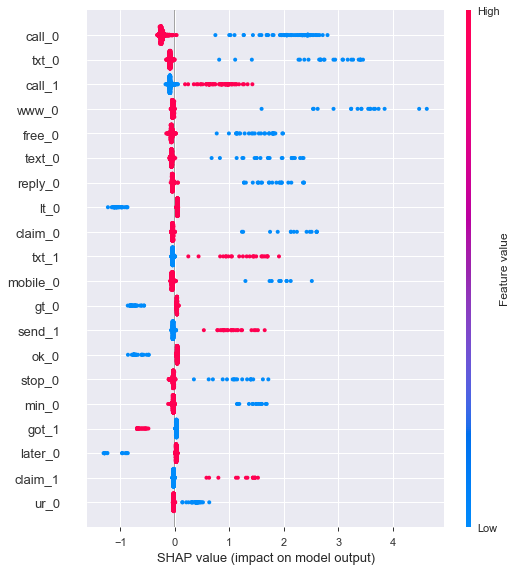

In [23]:
#step3 : getting insights from model perfromance
interpret_model (tuned_pce_1_m1)